<a href="https://colab.research.google.com/github/gdmeyerp/Tensorflow/blob/main/Clasificaciondeimagenes11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



### > Procesamiento de imagenes usando API Tensorflow y Keras.

La API Tensorflow es una aplicacion digital que posee herramientas fundamentales para la construccion y desarrollo de redes neuronales con mucha mas facilidad ya que cuenta con unos algoritmos preestablecidos que estan diseñados para obtener cierto tipo de patrones en las imagenes los cuales sirven para obtener caracteristicas y estas utilizarlas en el procesamiento de la imagane, gracias a la red de neuronal que posee TensorFlow y Keras que de otra manera no seria tan sencillo

In [ ]:
import cv2

## Clasificacion de imagenes usando Tensorflow y Keras.




In [ ]:
import os
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

data_path="/tmp/"
data_dir_list=os.listdir(data_path)

['claudia lopez.png', 'petros.jpg', 'mejia2.png', 'maria-fernanda-cabal-youtubers-auronplay-luisito-comunica-dross-german-785963.jpg', 'Sarmientoangulo.png', 'Sin título.png', 'mejia1.png', 'uribe2.png', 'uribe1.png', 'CABAL.png']
Original Dimensions :  (193, 178, 4)
Resized Dimensions :  (300, 300, 4)


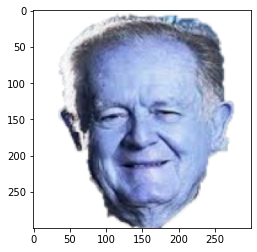

In [ ]:
#print(data_dir_list[:10])
img = cv2.imread('/tmp/Sarmientoangulo.png', cv2.IMREAD_UNCHANGED)

print('Original Dimensions : ',img.shape)

width = 300
height = 300
dim = (width, height)

# resize image
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

print('Resized Dimensions : ',resized.shape)
plt.imshow(resized)

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.imagenet_utils import preprocess_input,decode_predictions

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
train_data_dir="/content/drive/MyDrive/Data/Entrenamiento/"
validation_data_dir="/content/drive/MyDrive/Data/Validacion/"
train_data_names=os.listdir(train_data_dir)

print(train_data_names[:10])

['Labrador', 'Chihuahua', 'Shih-Tzu', 'EnglishFoxHound', 'Basset', 'Beagle', 'BloodHound']


In [ ]:
train_datagen=ImageDataGenerator(rotation_range=20,
                                 zoom_range=0.2,
                                 width_shift_range=0.1,
                                 height_shift_range=0.1,
                                 horizontal_flip=True,
                                 vertical_flip=False,
                                 preprocessing_function=preprocess_input)
valid_datagen=ImageDataGenerator( rotation_range=20,
                                 zoom_range=0.2,
                                 width_shift_range=0.1,
                                 height_shift_range=0.1,
                                 horizontal_flip=True,
                                 vertical_flip=False,
                                 preprocessing_function=preprocess_input)
train_generator=train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(300,300),
    batch_size=32,
    #save_to_dir="/content/drive/MyDrive/Data/Entrenamiento1/Labrador",
    class_mode='categorical'
    )
validation_generator=valid_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(300,300),
    batch_size=32,
    #save_to_dir="/content/drive/MyDrive/Data/Validacion1",
    class_mode='categorical'
    )


Found 850 images belonging to 7 classes.
Found 401 images belonging to 7 classes.


In [ ]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(7, activation='softmax')
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 35, 35, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 78400)            

In [ ]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(lr=0.001),metrics=['accuracy'])

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,
      epochs=5,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/5
8/8 [==============================] - 37s 5s/step - loss: 323.0672 - accuracy: 0.1758 - val_loss: 5.5849 - val_accuracy: 0.1758
Epoch 2/5
8/8 [==============================] - 35s 4s/step - loss: 3.9599 - accuracy: 0.1405 - val_loss: 2.1239 - val_accuracy: 0.1836
Epoch 3/5
8/8 [==============================] - 36s 5s/step - loss: 2.1227 - accuracy: 0.1445 - val_loss: 2.0027 - val_accuracy: 0.2031
Epoch 4/5
8/8 [==============================] - 35s 4s/step - loss: 2.0114 - accuracy: 0.1942 - val_loss: 2.1212 - val_accuracy: 0.1445
Epoch 5/5
8/8 [==============================] - 37s 5s/step - loss: 1.9998 - accuracy: 0.1992 - val_loss: 2.1312 - val_accuracy: 0.1523


In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

Saving n02088238_9467.jpg to n02088238_9467.jpg


In [ ]:
import numpy as np
import random
import matplotlib as plt
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_data_dir, f) for f in train_data_names]
img_path = "/content/drive/MyDrive/Data/Entrenamiento1/Labrador/_0_7472235.png"

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:]]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale* n_features, scale))
    plt.title(layer_name)
    plt.grid(True)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in true_divide


TypeError: ignored